In [30]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html#scipy.spatial.transform.Rotation

# my library of functions for this project l
# octa_lib contains vertices,faces of an octahedron 
from octa_lib import * 

%load_ext autoreload
%autoreload 1
%aimport octa_lib

# for reading images 
from pims import pipeline
from pims import Frame
import pims

from scipy.signal import savgol_filter

from skimage.draw import polygon
from skimage import feature
from skimage.feature import match_template

from skimage.filters import gaussian

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# read in video images 
frames_dir = 'spin_track/Aug_2_2022/o_*.png'
framesrgb = pims.open(frames_dir) 
print(len(framesrgb),framesrgb[10].shape)

fps =1000.0  #video fps
d8_length = 23.65 #  mm with calipers measured red to red pts and green to green opposite points
theta_cam_deg = 45 # camera angle


118 (1080, 1920, 3)


Frame([[ 11,  11,  10, ..., 167, 171, 171],
       [ 17,  15,  17, ..., 166, 170, 170],
       [ 16,  16,  19, ..., 168, 170, 170],
       ...,
       [141, 148, 142, ..., 153, 153, 152],
       [132, 135, 133, ..., 146, 146, 145],
       [139, 138, 132, ..., 145, 145, 146]], dtype=uint8)
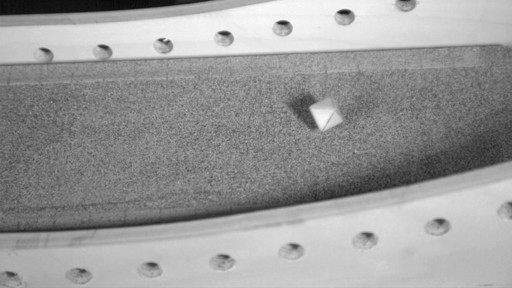

In [24]:
framesrgb[30][:,:,0]

0.3613191964055291


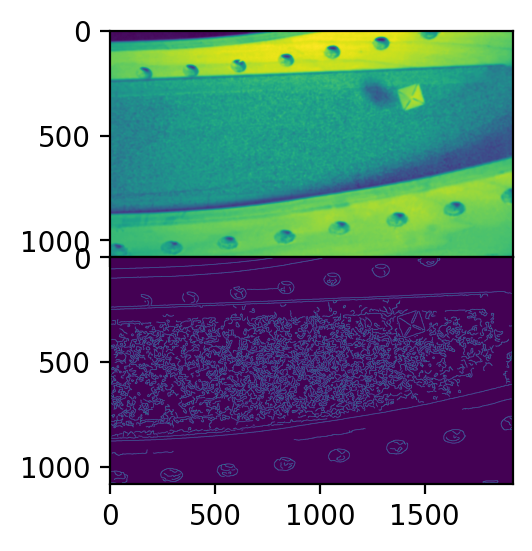

In [48]:
img = np.array(framesrgb[20][:,:,1])  # g image
img_s = gaussian(img,sigma=3)
fig,axarr = plt.subplots(2,1,figsize=(8,3),sharey=True,sharex=True,dpi=200)
plt.subplots_adjust(hspace=0,wspace=2)
axarr[0].imshow(img_s)
#edges1 = feature.canny(img,sigma=4)
canny_sigma = 1.5  # parameters for canny, low should be below median 
canny_low = 0; canny_high =0.05
edges2 = feature.canny(img_s,sigma=canny_sigma,low_threshold=canny_low,high_threshold=canny_high)
axarr[1].imshow(edges2,vmin=0,vmax=1)
print(np.median(img_s))

In [49]:
# read in video images 
frames_dir = 'spin_track/Aug_2_2022/o10_*.png'
framesrgb = pims.open(frames_dir) 
print(len(framesrgb),framesrgb[10].shape)

fps =1000.0  #video fps
d8_length = 23.65 #  mm with calipers measured red to red pts and green to green opposite points
theta_cam_deg = 45 # camera angle


524 (512, 1280, 3)


In [59]:
print(np.median(framesrgb[20][:,:,0])) # r 
print(np.median(framesrgb[20][:,:,1])) # g

124.0
88.0


35.33875391257061


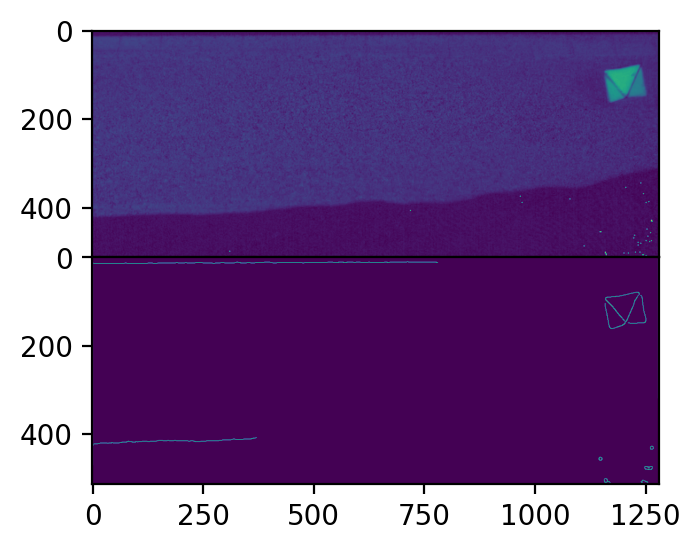

In [61]:
img = np.array(framesrgb[20][:,:,0] - framesrgb[20][:,:,1])  # r image
img_s = gaussian(img,sigma=2,preserve_range=True)
fig,axarr = plt.subplots(2,1,figsize=(8,3),sharey=True,sharex=True,dpi=200)
plt.subplots_adjust(hspace=0,wspace=2)
axarr[0].imshow(img)
#edges1 = feature.canny(img,sigma=4)
canny_sigma = 2.5  # parameters for canny, low should be below median 
canny_low = 10; canny_high =30
edges2 = feature.canny(img_s,sigma=canny_sigma,low_threshold=canny_low,high_threshold=canny_high)
axarr[1].imshow(edges2,vmin=0,vmax=1)
print(np.median(img_s))